# Cats and Dogs image Classification

In [3]:
# Install packages

#!pip install tflearn
#!pip install tensorflow
#!pip install tqdm
#!pip install opencv-python

In [27]:
# Imports and Settings

import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

train_dir = 'C:\\Users\\Fede y Sol\\Desktop\\Fede\\Data analysis\\GitHub\\CatsVsDogs\\Data\\train'
test_dir = 'C:\\Users\\Fede y Sol\\Desktop\\Fede\\Data analysis\\GitHub\\CatsVsDogs\\Data\\test'
img_size = 50
learn_rate = 1e-3

model_name = "catsvsdogs-{}-{}.model".format(learn_rate,"2conv-basic")

In [28]:
# Labels images from their names [cat,dog]

def label_img(img):
    word_label = img.split(".")[-3]
    if word_label == "cat": return [1,0]
    elif word_label == "dog": return [0,1]

In [29]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(train_dir)):
        label = label_img(img)
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size,img_size)) # we need all the images in the same size and grey scale
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save("train_data.npy", training_data)
    return training_data

In [48]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size,img_size))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [31]:
train_data = create_train_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:39<00:00, 628.61it/s]
C:\Users\Fede y Sol\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [42]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

In [43]:
convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=learn_rate, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


In [44]:
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 1148  | total loss: 0.48713 | time: 25.212s
| Adam | epoch: 003 | loss: 0.48713 - acc: 0.7578 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.48493 | time: 26.273s
| Adam | epoch: 003 | loss: 0.48493 - acc: 0.7617 | val_loss: 0.54242 - val_acc: 0.7420 -- iter: 24500/24500
--


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:20<00:00, 602.65it/s]
C:\Users\Fede y Sol\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


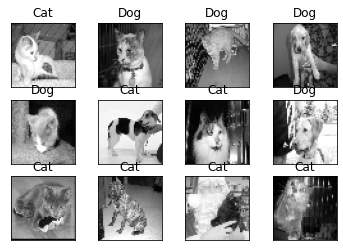

In [49]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
